In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

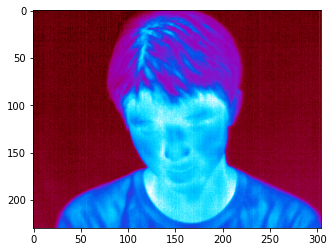

In [2]:
path = "G:\Thermal Using Google Data\Image Processing Methods Online Data\Images/D_U01194632.bmp"
img = cv.imread(path)
plt.savefig("./D_Image_Processing/D_Thermal1.jpg")
plt.imshow(img)

# HISTOGRAM EQUALIZATION

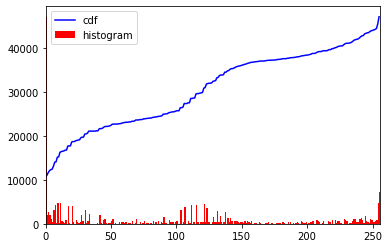

In [3]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.savefig("./D_Image_Processing/D_Thermal_Histogram.jpg")
plt.show()


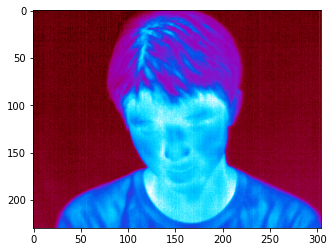

In [4]:
import cv2 
import matplotlib.pyplot as plt
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Original image', image)
cv2.imshow('Gray image', gray)
plt.savefig("./D_Image_Processing/D_Thermal3.jpg")
plt.imshow(image)



# GRAYSCALE

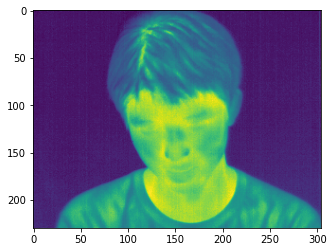

In [5]:
plt.imshow(gray)
plt.savefig("./D_Image_Processing/D_Thermal4.jpg")

# RGB

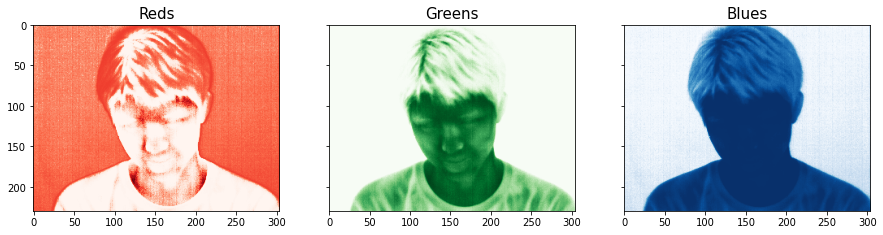

In [6]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)
rgb_splitter(image)
plt.savefig("./D_Image_Processing/D_Thermal_RGB.jpg")

# RESIZING

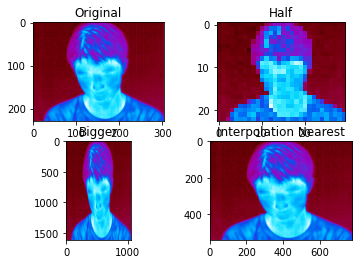

In [7]:
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))
 
stretch_near = cv2.resize(image, (780, 540),
               interpolation = cv2.INTER_NEAREST)
 
 
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
plt.savefig("./D_Image_Processing/D_Thermal_Resized.jpg")
plt.show()

# K MEANS CLUSTERING FOR BLOOD PATCH

In [8]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [10]:
print(pixel_values.shape)

(69920, 3)


In [11]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [12]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [13]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [14]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

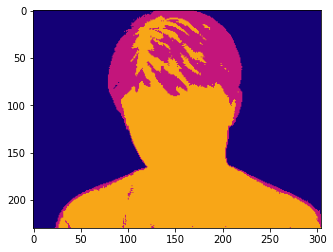

In [15]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.savefig("./D_Image_Processing/D_Thermal_K-Mean.jpg")
plt.show()

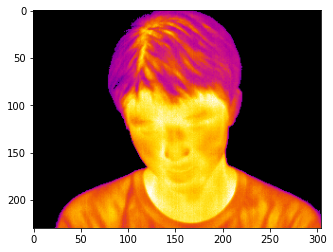

In [16]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.savefig("./D_Image_Processing/D_Thermal_K-Mean1.jpg")
plt.show()


# FEATURE EXTRACTION AND COLOR HISTOGRAM FOR BLOOD PATCH

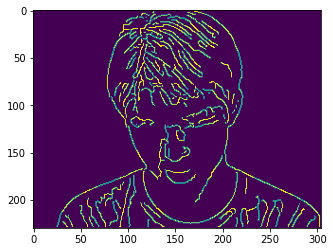

In [17]:
import skimage
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import os
filename = os.path.join(os.getcwd(),path)
from skimage import io
bird =io.imread(filename)
plt.imshow(gray)
from skimage import feature
edges = feature.canny(gray,sigma=1)
plt.savefig("./D_Image_Processing/D_Thermal1_Feature_Extraction.jpg")
plt.imshow(edges )

# IMAGE TRANSFORMATION METHODS


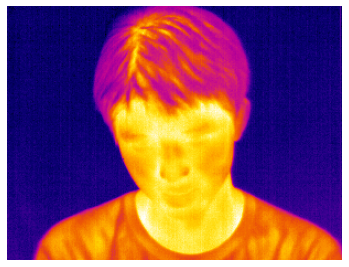

In [18]:
import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

pic=imageio.imread(path)

plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off');
plt.savefig("./D_Image_Processing/D_Thermal1_Image_Transformation.jpg")

# COLOR NEGATIVE FOR BLOOD PATCH

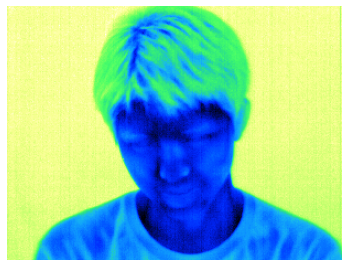

In [19]:
negative =255- pic # neg = (L-1) - img

plt.figure(figsize= (6,6))
plt.imshow(negative);
plt.axis('off');
plt.savefig("./D_Image_Processing/D_Thermal1_Color_Negative.jpg")

# LOG TRANSFORMATION FOR BLOOD PATCH

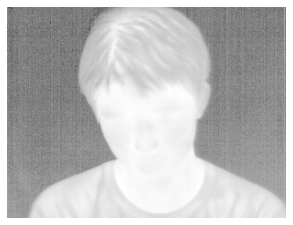

In [20]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

pic=imageio.imread(path)
gray=lambda rgb : np.dot(rgb[...,:3],[0.299,0.587,0.114])
gray=gray(pic)


'''
log transform
-> s = c*log(1+r)

So, we calculate constant c to estimate s
-> c = (L-1)/log(1+|I_max|)

'''


max_=np.max(gray)

def log_transform():
    return(255/np.log(1+max_))*np.log(1+gray)

plt.figure(figsize=(5,5))
plt.imshow(log_transform(),cmap=plt.get_cmap(name='gray'))
plt.axis('off');
plt.savefig("./D_Image_Processing/D_Thermal1_Log_Transformation.jpg")

# GAMMA CORRECTION FOR BLOOD PATCH

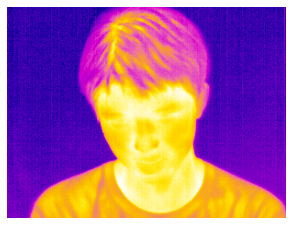

In [21]:
import imageio
import matplotlib.pyplot as plt

# Gamma encoding 
pic=image 
io.imread(path)
gamma=2.2# Gamma < 1 ~ Dark ; Gamma > 1 ~ Bright

gamma_correction=((pic/255)**(1/gamma))
plt.figure(figsize=(5,5))
plt.imshow(gamma_correction)
plt.axis('off');
plt.savefig("./D_Image_Processing/D_Thermal1_Gamma_Correction.jpg")